In [3]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import qickdawg as qd
from scipy.optimize import curve_fit

qd.start_client('128.252.134.24')

min_step_us = qd.soccfg.cycles2us(1) # this is the minimum step size in us, which is the time for one clock cycle
min_step_ns = min_step_us*1e3
max_int_time_us = min_step_us * (2**16 - 1)
max_int_time_ns = min_step_ns * (2**16 - 1)

default_config = qd.NVConfiguration()
default_config.adc_channel = 0
default_config.adc_trigger_offset_treg = 177
default_config.mw_channel = 0
default_config.mw_nqz = 1
default_config.mw_gain = 5000
default_config.laser_gate_pmod = 0
default_config.switch_pmod = 1
default_config.relax_delay_tns = 500 # between each rep, wait for everything to catch up, mostly aom

In [17]:

config = copy(default_config)

config.readout_integration_tus = max_int_time_us
config.mw_gain = 3000
config.mw_channel = 0
config.switch_pmod = 1
config.pre_init = True 
config.reps = 30
config.relax_delay_treg = 50

config.add_linear_sweep('mw', 'fMHz', start=2500, stop=3000, delta=1)

prog = qd.LockinODMR(config)
d = prog.acquire()

  0%|          | 0/30060 [00:00<?, ?it/s]

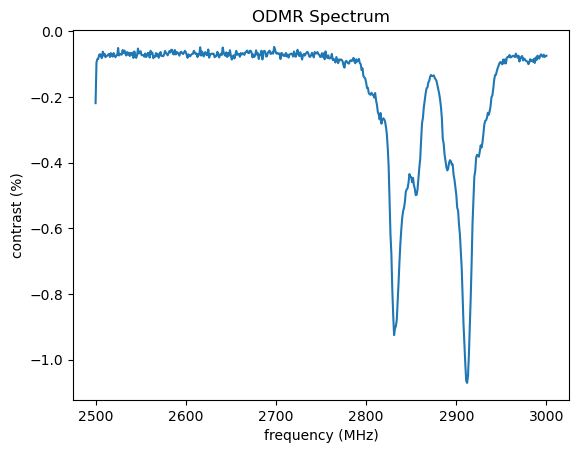

In [18]:
plt.plot(d.frequencies, d.odmr_contrast)

plt.title('ODMR Spectrum')
plt.ylabel('contrast (%)')
plt.xlabel('frequency (MHz)')

plt.show()

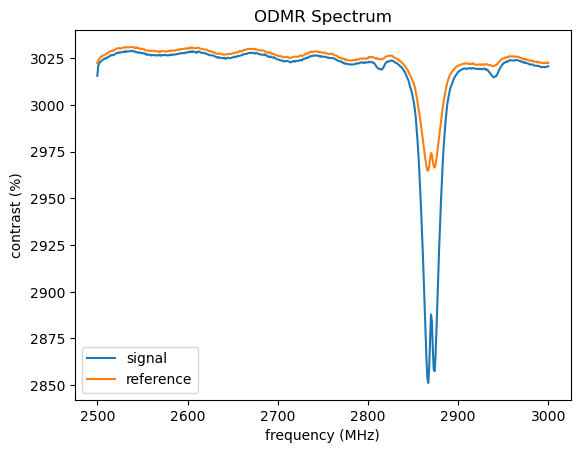

In [13]:
plt.plot(d.frequencies, d.signal, label='signal')
plt.plot(d.frequencies, d.reference, label='reference')

plt.title('ODMR Spectrum')
plt.ylabel('contrast (%)')
plt.xlabel('frequency (MHz)')
plt.legend()

plt.show()

In [4]:
qd.laser_on(default_config)

  0%|          | 0/1 [00:00<?, ?it/s]

-131.96176470588236

In [7]:
qd.laser_off(default_config)

  0%|          | 0/1 [00:00<?, ?it/s]

-129.6827038986801